## **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## **Import dataset**

In [2]:
drive.mount('/content/drive')
dataset = ("/content/drive/My Drive/ML projects/Task 2: Emotion Recognition from Speech/Toronto emotional speech set data(TESS)/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load dataset**

In [3]:
paths = []
labels = []

for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

In [4]:
len(paths)

2800

In [5]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [6]:
# Create a dataframe

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/My Drive/ML projects/Task 2: Em...,neutral
1,/content/drive/My Drive/ML projects/Task 2: Em...,neutral
2,/content/drive/My Drive/ML projects/Task 2: Em...,neutral
3,/content/drive/My Drive/ML projects/Task 2: Em...,neutral
4,/content/drive/My Drive/ML projects/Task 2: Em...,neutral


In [7]:
df['label'].value_counts()

,count
label,
sad,600
ps,600
neutral,400
happy,400
fear,400
angry,200
disgust,200


## **Exploratory Data Analysis**

<Axes: xlabel='count', ylabel='label'>

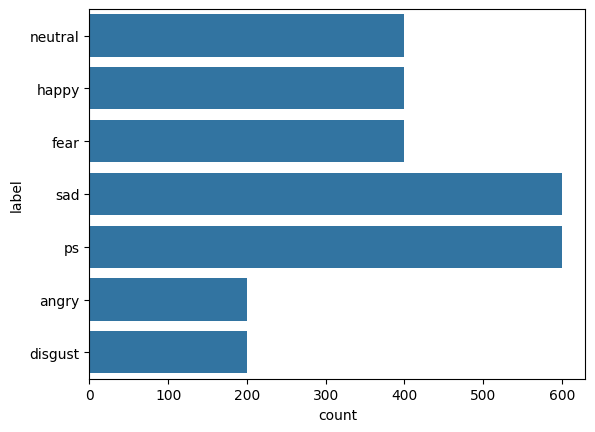

In [8]:
sns.countplot(df['label'])

In [9]:
# Function to view the waveform of the audio file

def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

In [10]:
# Function to view the frequency levels of the audio file

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar

## **Waveplot & spectrogram of an audio file from each class**

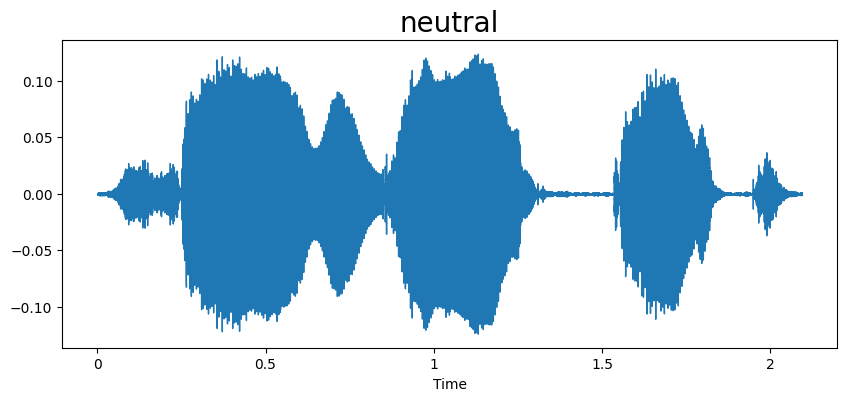

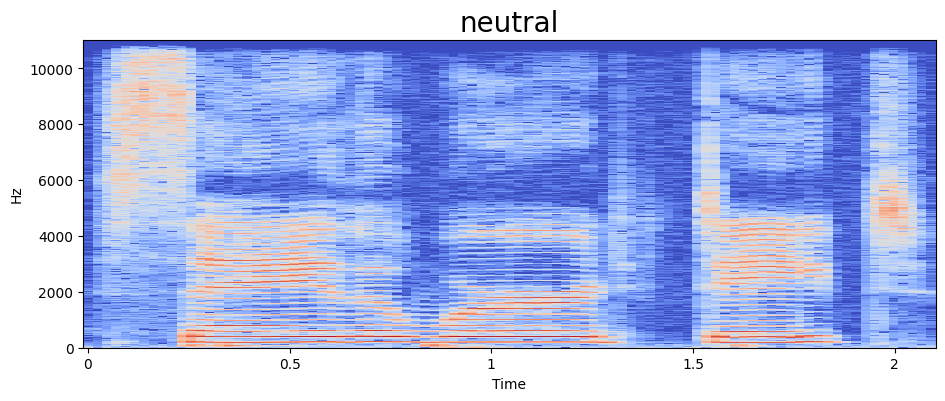

In [11]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

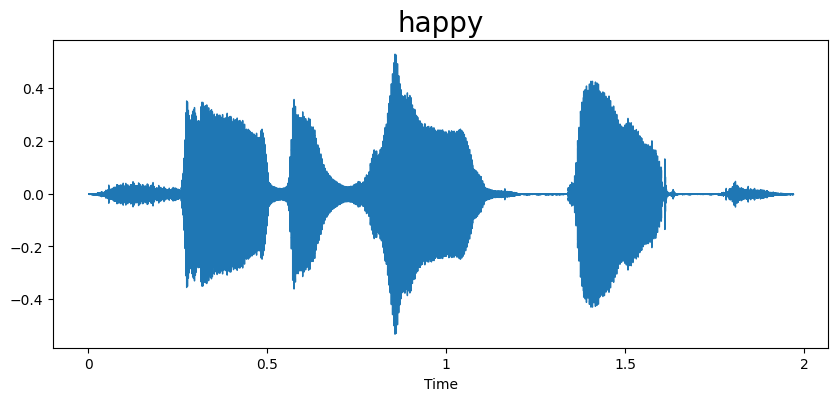

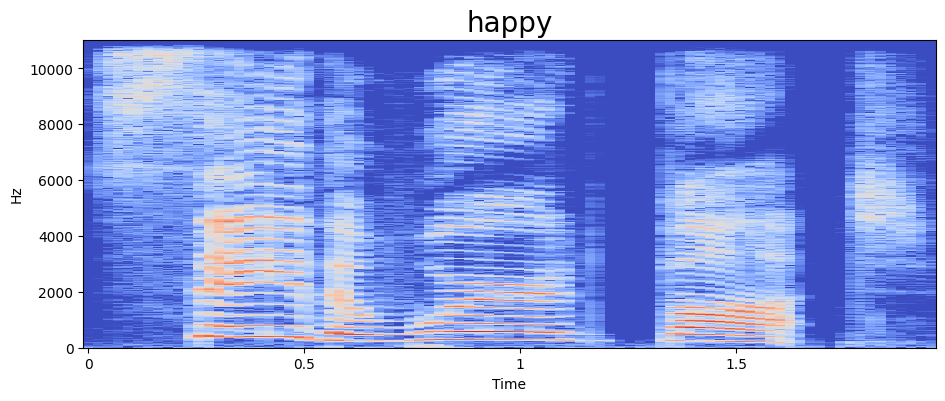

In [12]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

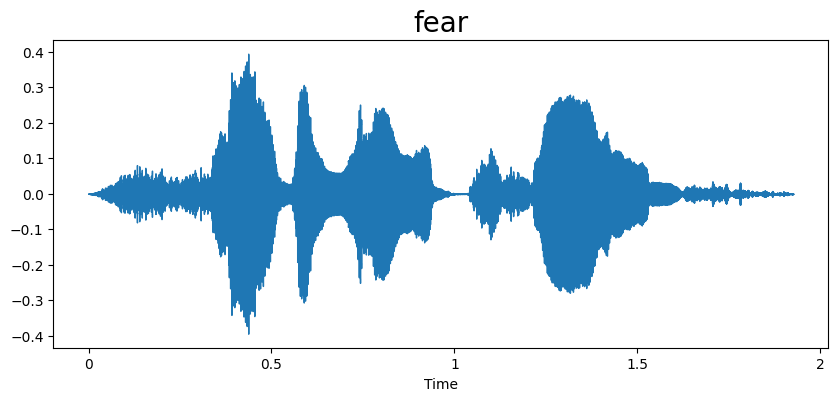

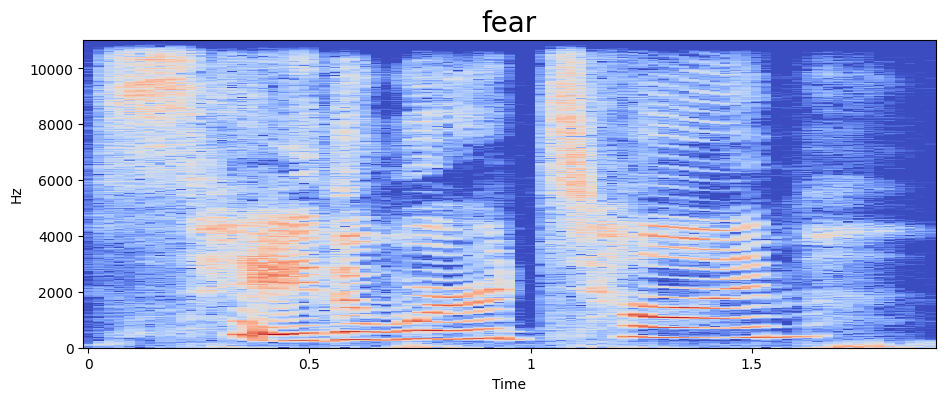

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

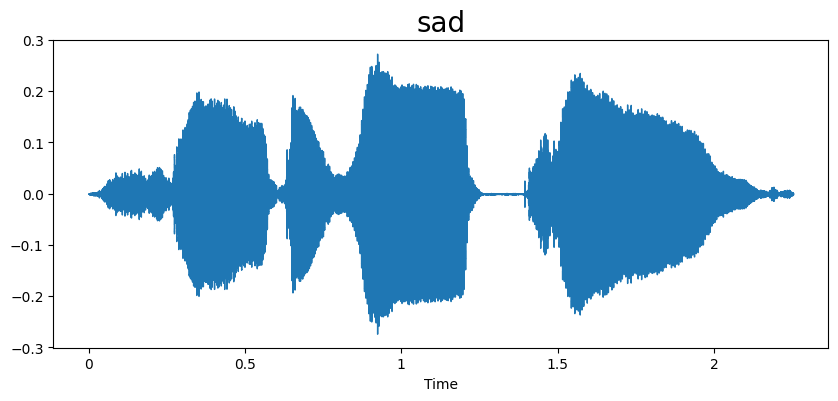

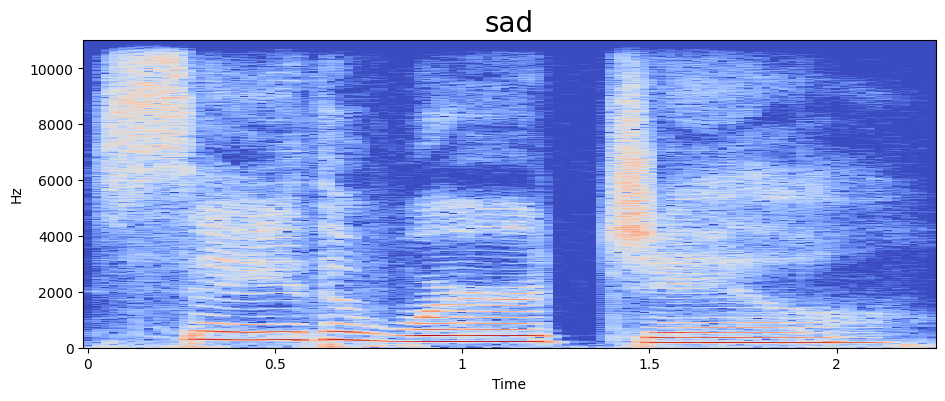

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

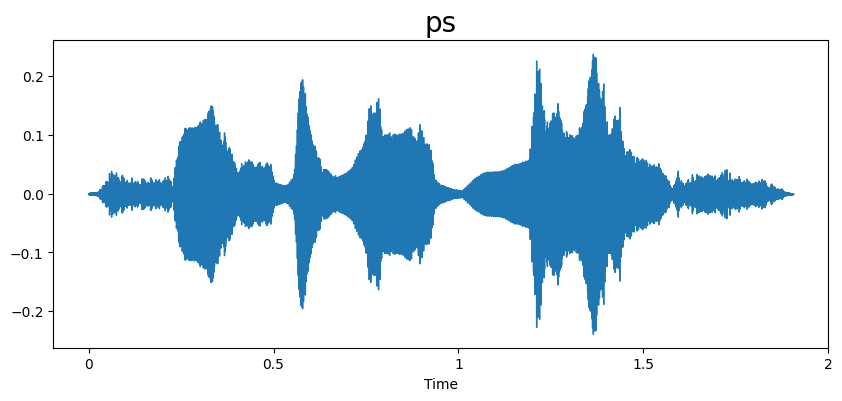

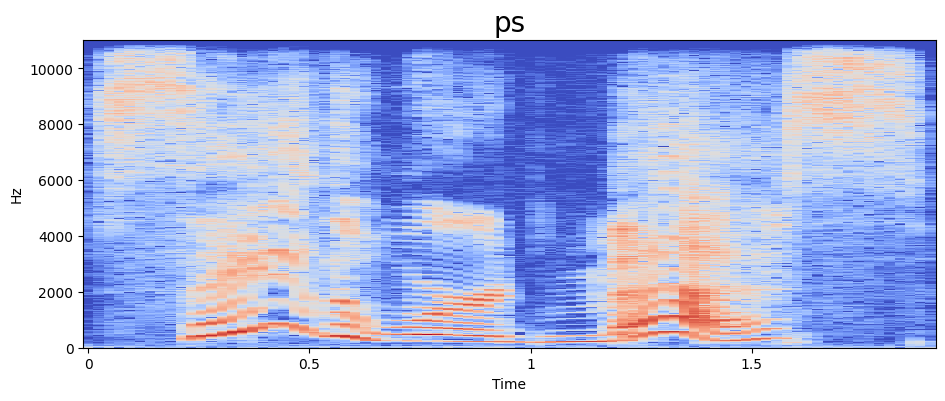

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

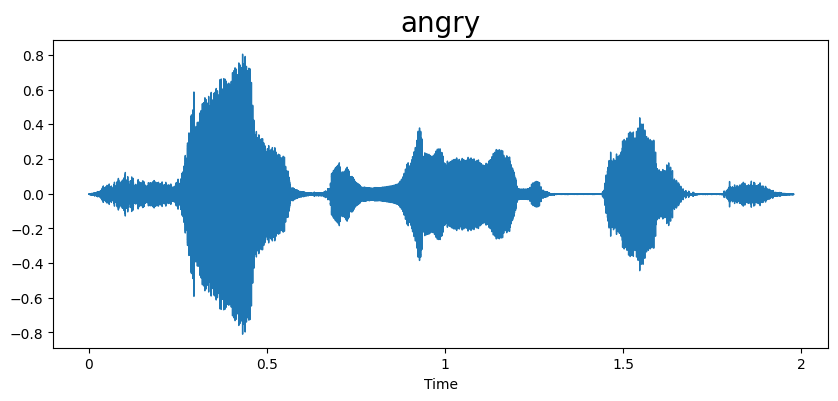

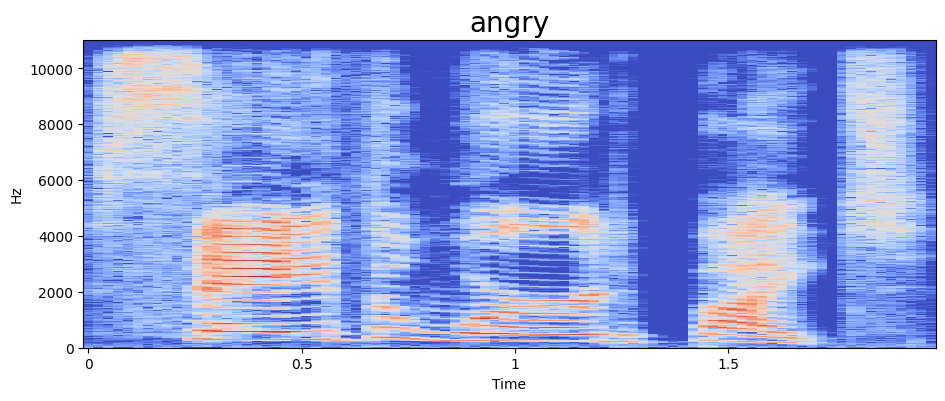

In [16]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

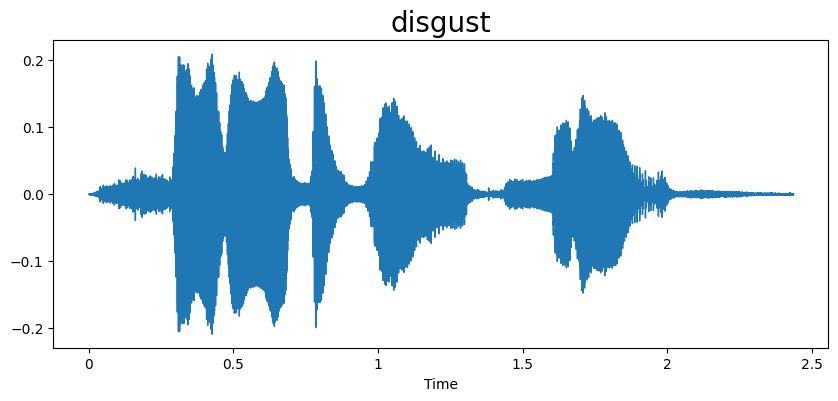

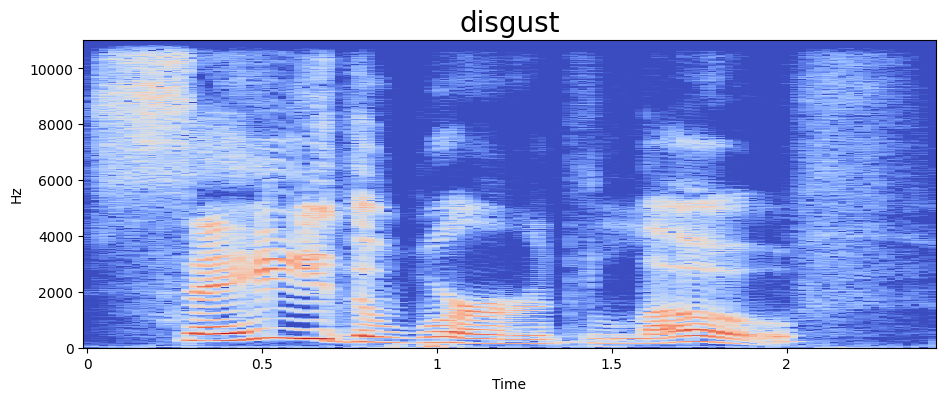

In [17]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## **Feature extraction**

In [18]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-4.2447168e+02,  6.3875172e+01, -7.6376705e+00,  4.1989399e+01,
        2.9193730e+00, -6.5809507e+00,  1.5053463e+00, -1.7350943e+01,
       -1.9774871e+00,  1.7474079e+00, -1.8633087e+01,  1.6664972e+01,
       -6.8643727e+00,  5.0587645e+00,  5.2101989e+00, -7.4888039e+00,
        6.1589661e+00,  2.8012520e-01, -9.0757389e+00,  2.9020903e+00,
       -3.7879629e+00, -6.0458975e+00, -6.0671721e+00, -4.2440945e-01,
       -7.7345376e+00, -8.2383740e-01, -4.5748353e+00, -9.8806345e-01,
       -8.9765549e+00, -3.3233588e+00, -9.6494141e+00,  6.9611659e+00,
        1.0515302e+01,  2.8444838e+01,  2.9332664e+01,  2.8531286e+01,
        1.4900858e+01,  3.7672615e+00, -6.1049457e+00,  5.8923215e-01],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

,speech
0,"[-424.47168, 63.87517, -7.6376705, 41.9894, 2...."
1,"[-443.49173, 135.16476, 26.464457, 20.139612, ..."
2,"[-412.1384, 49.514244, -4.1008425, 25.554003, ..."
3,"[-396.11926, 89.746574, -7.7495017, 36.0479, -..."
4,"[-411.35928, 81.070946, -3.5014722, 34.19444, ..."
...,...
2795,"[-400.31952, 81.09755, -16.299755, 9.9726095, ..."
2796,"[-397.97693, 89.60047, 7.5329833, 7.3120265, -..."
2797,"[-383.37564, 108.15568, -17.578178, 15.888096,..."
2798,"[-432.92487, 116.549255, -3.456824, 14.167912,..."


In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
print(df.columns)

Index(['speech', 'label'], dtype='object')


In [27]:
print(df.head())

                                              speech    label
0  /content/drive/My Drive/ML projects/Task 2: Em...  neutral
1  /content/drive/My Drive/ML projects/Task 2: Em...  neutral
2  /content/drive/My Drive/ML projects/Task 2: Em...  neutral
3  /content/drive/My Drive/ML projects/Task 2: Em...  neutral
4  /content/drive/My Drive/ML projects/Task 2: Em...  neutral


In [29]:
y.shape

(2800, 7)

## **Model (LSTM)**

In [30]:
model = Sequential([
    LSTM(256, return_sequences = False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X, y, validation_split = 0.2, epochs = 50, batch_size = 64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.5804 - loss: 1.1962 - val_accuracy: 0.0750 - val_loss: 4.6864
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9696 - loss: 0.1221 - val_accuracy: 0.3000 - val_loss: 3.8938
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.9797 - loss: 0.0911 - val_accuracy: 0.2232 - val_loss: 5.0829
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9862 - loss: 0.0496 - val_accuracy: 0.4000 - val_loss: 3.9470
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.9785 - loss: 0.0785 - val_accuracy: 0.4571 - val_loss: 3.4544
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9897 - loss: 0.0462 - val_accuracy: 0.5036 - val_loss: 3.5288
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.9805 - loss: 0.0582 - val_accuracy: 0.4714 - val_loss: 3.9176
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9905 - loss: 0.0457 - val_accurac